## Twitter Sentiment Analysis for Apple and Google Products

## 1. Business Undestanding

### a) Introduction

In the realm of technology giants, Apple and Google, public sentiment plays a pivotal role in shaping their strategies and brand perception. This analysis focuses on understanding the dynamics of sentiment expressed on Twitter concerning these companies. Apple and Google have a significant global presence and are influenced by various factors, including product launches and developments. Last year, Apple's revenue exceeded 300 billion USD, while Google's parent company, Alphabet, reported revenues of over 181 billion USD. Monitoring and leveraging public sentiment can provide valuable insights for both companies in guiding marketing strategies and product development decisions.

### b) Problem Statement

The challenge at hand is to harness the  amount of sentiment data from Twitter and convert it into actionable insights for Apple and Google. This analysis aims to uncover patterns and trends in sentiment fluctuations concerning these companies. Detecting spikes in sentiment and identifying their underlying causes can enable more informed decision-making, whether it involves addressing product issues or capitalizing on positive public perception.

### c) Main Objective

The primary goal of this project is to analyze Twitter sentiment data related to Apple and Google comprehensively. By doing so, we intend to provide stakeholders within these organizations with valuable insights into the ebb and flow of public sentiment. Understanding when and why sentiment shifts occur can guide product development strategies, marketing campaigns, and brand management.

### d) Metric of Success

The success of our project hinges on its ability to extract meaningful insights from Twitter sentiment data. Our evaluation metric will include the effectiveness of identifying sentiment spikes, trends in sentiment over time, and the correlation between sentiment and significant events, such as product launches or controversies. Additionally, the project's impact on informing data-driven decision-making within Apple and Google will be a key measure of success.

### e) Specific Objectives

- To explore and preprocess the dataset, including handling missing values, transforming features
- To perform exploratory data analysis to gain insights into the distribution and relationships between different features and the target variable.
- To build binary and multiclass classification and evaluate their performance using appropriate metrics.
- To interpret the results of the models
- To provide recommendations to stakeholders based on the insights gained from the modeling processa

## 2. Data understanding
The dataset originates from CrowdFlower, accessed via data.world. The choice of this dataset is highly suitable for our project's objectives. It contains over 9,000 tweets that have been manually rated for sentiment (positive, negative, or neither). These tweets serve as a valuable resource for training and testing our sentiment analysis models. Since Twitter is a prominent platform for users to express their opinions and sentiments publicly, this data represents real-world sentiment effectively.

The dataset is sufficiently large, comprising over 9,000 tweets, which ensures an ample amount of data for model training and validation. The features used in our analysis have been carefully selected based on their properties and relevance to the project's objectives. Features such as tweet_text and emotion toward a brand or product are integral to understanding sentiment and determining the factors influencing it.

While the dataset is valuable, it does have limitations that could impact our analysis. For instance, tweet sentiment is not always straightforward to discern, as it may depend on context, sarcasm, or language nuances. Additionally, the dataset may not be fully representative of all sentiments expressed on Twitter.

## 3. Data Preparation

Importing libraries

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import os
import re
import sys
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import xgboost as xgb
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Loading dataset

In [3]:
# load the dataset and preview first five rows
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# getting information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
# getting the shape of the data
data.shape

(9093, 3)

In [6]:
# Calculate sentiment counts
sentiment_counts = data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print(sentiment_counts)

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


From the value count it's evident that the majority of people who tweeted either do not express any specific emotion towards a brand or product, while a relatively small number of tweets fall into categories where the sentiment (positive or negative) is not clearly discernible

In [7]:
# examine text data to see what kind of data we working with
data['tweet_text'].head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

## 4. Data Cleaning

- Dropping unwanted columns
- Handling missing values.
- Renaming columns and sentiment
- Cleaning text data 
- Text Vectorization

Dropping unwanted columns and 'i cant tell' category 

In [8]:
# dropping emotion_in_tweet_is_directed_at column since we wont be using it modelling
columns_to_drop = ['emotion_in_tweet_is_directed_at']
data = data.drop(columns=columns_to_drop)

In [9]:
# checking if the column has been dropped 
data.head()
# 'the emotion in tweet is directed at' column has been dropped.

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [10]:
# dropping 'i cant tell' and No emotion toward brand or product' category since we will only be using the two sentiments.
data = data[(data['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell")]

In [11]:
# checking to see if 'i cant tell' category has been dropped and 'No emotion toward brand or product' has been replaced
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
Name: count, dtype: int64

We have performed data preprocessing by removing the 'emotion_in_tweet_is_directed_at' column, leaving us with two columns for further analysis. Additionally, we have excluded the 'I can't tell' category from the 'emotion' column, resulting in our dataset containing only the 'Positive,' 'Negative,' and 'No emotion toward brand or product' sentiments.

Handling mising values

In [12]:
# checking if our dataset has missing values
data.isna().sum()

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [13]:
# dropping the row with missing values
# since we cannot impute text
data = data.dropna(subset=['tweet_text'])


In [14]:
# checking if the row with missing values has been dropped
data.isna().sum()

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

Handling duplicates

We will check if there are any duplicated values, drop them incase they are there and keep the first value

In [15]:
data['tweet_text'].duplicated().sum()

27

In [16]:
data = data.drop_duplicates(subset='tweet_text', keep='first')

Renaming column and 'No emotion toward a brand or product' category

In [17]:
#renaming'is_there_an_emotion_directed_at_a_brand_or_product'column to emotion to make it easy to work with
data.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

In [18]:
# previewing the first five rows to check if the column has been renamed.
data.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [19]:
# renaming 'No emotion toward a brand a brand or product' as neutral for easy analysis
data['emotion'] = data['emotion'].replace({'No emotion toward brand or product': 'Neutral'})


In [20]:
# checking to see if the row has been renamed
data.emotion.value_counts()

emotion
Neutral             5372
Positive emotion    2968
Negative emotion     569
Name: count, dtype: int64

We have simplified our analysis by renaming the 'is_there_an_emotion_directed_at_a_brand_or_product' column to 'emotion' and relabeling 'No emotion toward brand or product' as 'neutral' for clarity and ease of interpretation.

Cleaning text data

In [21]:
# Function to clean text
def clean_text(text):
    # Ensure text is a string
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text
   
     #Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(filtered_tokens)

# Function to apply lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Apply text cleaning to the "tweet_text" column
data['cleaned_tweet'] = data['tweet_text'].apply(clean_text)

# Tokenize the "tweet_text" column
data['tokenized_tweet'] = data['cleaned_tweet'].apply(lambda x: word_tokenize(x))

# Apply lemmatization to the tokenized text
data['lemmatized_tweet'] = data['tokenized_tweet'].apply(lemmatize_text)

# Display the DataFrame with cleaned, tokenized, and lemmatized text
print(data[['tweet_text', 'cleaned_tweet', 'tokenized_tweet', 'lemmatized_tweet']])


                                             tweet_text   
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...  \
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                          cleaned_tweet   
0     wesley83 i have a 3g iphone after 3 hrs tweeti...  \
1     jessedee know about fludapp  awesome ipadiphon...   
2     swonderlin can not wait for  2 also they shoul...   
3     sxsw i hope this years festival isnt as crashy...

Tokenization serves to break text into smaller units or tokens, making the text more manageable for analysis. Lemmatization reduces words to their base forms, enhancing standardization and simplification of the text.

Text Vectorization

In [22]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Join the tokenized tweets into a single string with space as a separator
data['lemmatized_tweet'] = data['lemmatized_tweet'].apply(lambda x: ' '.join(x))

# Fit and transform your tokenized text
tfidf_matrix = tfidf_vectorizer.fit_transform(data['lemmatized_tweet'])

# The tfidf_matrix contains the TF-IDF vectors for the tweets

The code prepares and transforms the text data into a numerical format that can be used for sentimental analysis

## 5. Exploratory Data Analysis (EDA) 

Visualize the Distribution of Sentiment Labels

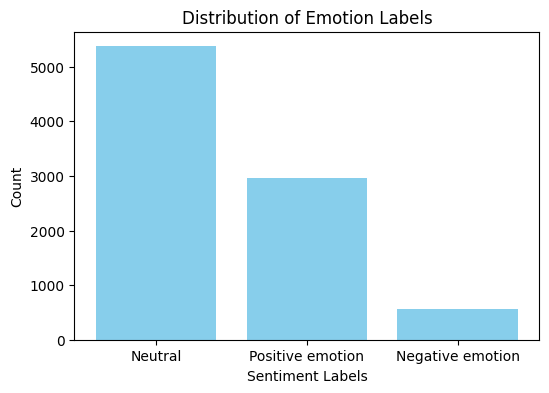

In [23]:
# Assuming you have a DataFrame 'data' with a 'sentiment' column
sentiment_counts = data['emotion'].value_counts()

# Create a bar chart to visualize sentiment distribution
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color="skyblue")
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()


From the visualization it's evident that the majority of people who tweeted either do not express any specific emotion towards a brand or product, while a relatively small number of tweets fall into categories where the sentiment (positive or negative) is not clearly discernible

Generating Word Clouds for Each Sentiment Class

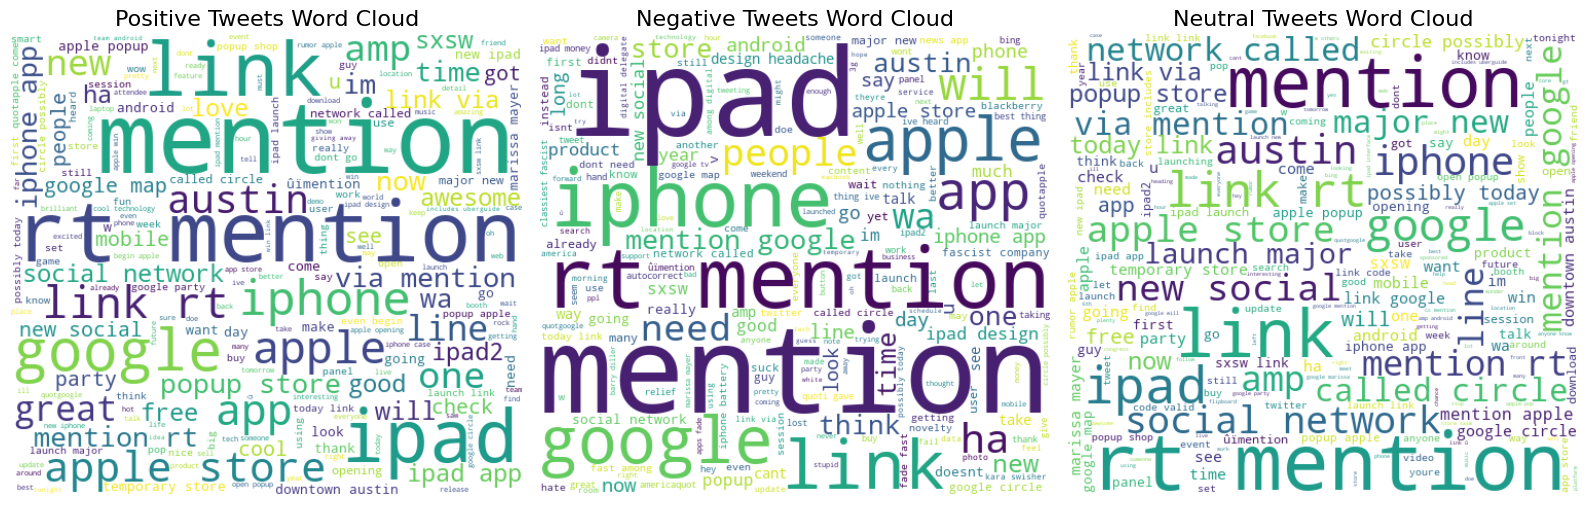

In [24]:
# generating word count using word cloud and getting the visualization
# Separate the dataset into positive, negative, neutral, and can't tell tweets
pos_tweets = data[data['emotion'] == 'Positive emotion']['lemmatized_tweet']
neg_tweets = data[data['emotion'] == 'Negative emotion']['lemmatized_tweet']

# Filter and clean the 'neutral' tweets, handling any non-string values 
neut_tweets = data[data['emotion'] == "Neutral"]['lemmatized_tweet']
#neut_tweets = neut_tweets.dropna().astype(str)  # Convert to string and drop NaN values
# Create a 2x2 grid of subplots for word clouds
plt.figure(figsize=(16, 10))

# Function to create and display a word cloud in a specific subplot
def generate_word_cloud_subplot(text, title, position):
    wordcloud = WordCloud(width=500, height=450, background_color='white', random_state=42).generate(text)
    
    plt.subplot(1,3, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')

# Create word clouds for each sentiment category in specific subplots
generate_word_cloud_subplot(' '.join(pos_tweets), 'Positive Tweets Word Cloud', 1)
generate_word_cloud_subplot(' '.join(neg_tweets), 'Negative Tweets Word Cloud', 2)
generate_word_cloud_subplot(' '.join(neut_tweets), 'Neutral Tweets Word Cloud', 3)

plt.tight_layout()  # Ensures that subplots are properly arranged
plt.show()


Visualization of  tweet lengths per category

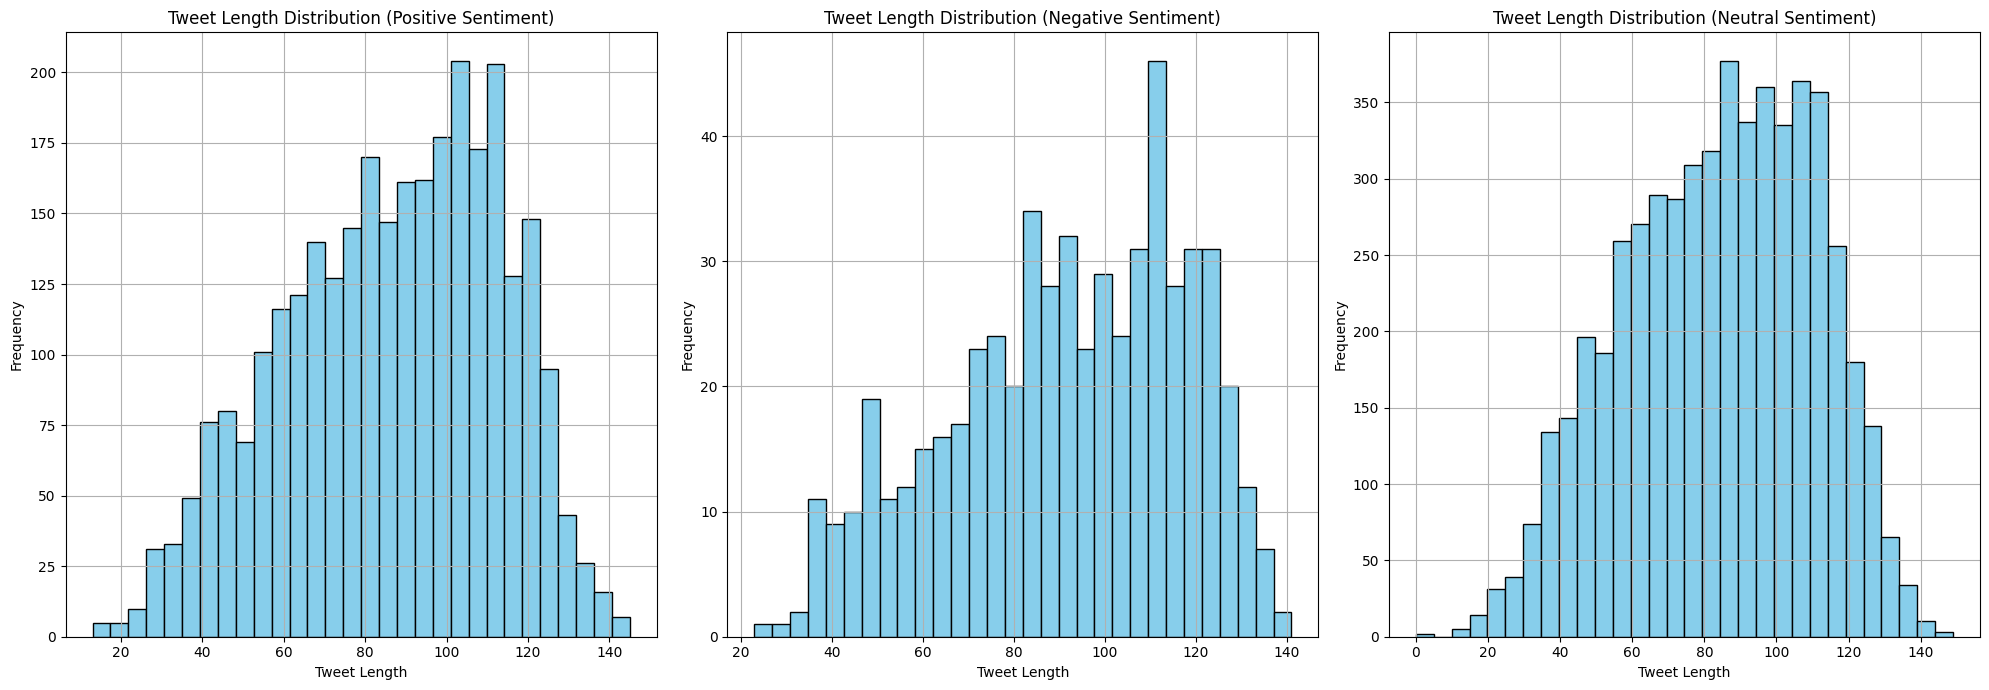

In [25]:
# checking the tweet lengths under each category
# Filter tweets by sentiment category
positive_tweets = data[data['emotion'] == 'Positive emotion']['lemmatized_tweet']
negative_tweets = data[data['emotion'] == 'Negative emotion']['lemmatized_tweet']
neutral_tweets = data[data['emotion'] == 'Neutral']['lemmatized_tweet']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Function to plot tweet length histograms
def plot_tweet_length_histograms(tweets, sentiment_label, ax):
    tweet_lengths = tweets.str.len()
    
    ax.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel('Tweet Length')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Tweet Length Distribution ({sentiment_label} Sentiment)')
    ax.grid(True)

# Plot histograms for each sentiment category
plot_tweet_length_histograms(positive_tweets, 'Positive', axes[0])
plot_tweet_length_histograms(negative_tweets, 'Negative', axes[1])
plot_tweet_length_histograms(neutral_tweets, 'Neutral', axes[2])

# Adjust subplots for tight layout
plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
plt.tight_layout()  # Ensures a tight layout

# Show the plots
plt.show()


The visualization above reveals that, in terms of tweet length, neutral tweets are the longest, followed by positive tweets and then negative tweets.

## 6. Modelling

###  Binary classification
We begin with binary classification, focusing on negative and positive emotions. We later extend the task to multiclass classification by adding a neutral class. The process involves the following steps:

Data Splitting - We split the filtered data into training and testing sets using the train_test_split function.

Label Encoding - To work with text labels, we encode 'emotion' labels ('Positive emotion' and 'Negative emotion') into numerical values ('Positive' as 1 and 'Negative' as 0) using LabelEncoder.

TF-IDF Vectorization - We utilize TF-IDF vectorization to convert the text data into numerical vectors. The TfidfVectorizer is employed to represent each tweet as a vector of TF-IDF features.

We assess the model's performance through accuracy calculation, a classification report containing precision, recall, and F1-score, and a confusion matrix, providing insights into its performance on individual classes.

The modeling techniques we will use include naive bayes model,utilizing Support Vector Classification (SVC) and Ranom Forest to further enhance our sentiment analysis task.

Baseline Model using Naive Bayes

Naive Bayes is selected as the baseline model for its simplicity, computational efficiency, and strong suitability for text classification tasks. Its straightforward nature allows for easy interpretation, making it an ideal starting point for modeling. Additionally, Naive Bayes provides a reasonable baseline performance, offering insights into achievable accuracy without the need for complex algorithms. This will also serve as a benchmark, helping assess whether more advanced models are justified.

In [26]:
# Create a LabelEncoder object to make sure 0 represents negative and 1 positive
label_encoder = LabelEncoder()

#  fit the encoder
custom_encoding = ['Negative', 'Positive']
label_encoder.fit(custom_encoding)

# Check the encoding mapping
encoded_classes = label_encoder.classes_

# Print the mapping
print("Encoded Classes:")
for code, sentiment in enumerate(encoded_classes):
    print(f"Code {code} represents '{sentiment}'")


Encoded Classes:
Code 0 represents 'Negative'
Code 1 represents 'Positive'


In [27]:
# Filter the data to include only 'Positive' and 'Negative' labels
filtered_data = data[(data['emotion'] == 'Positive emotion') | (data['emotion'] == 'Negative emotion')]

# Split the filtered data into features (X) and labels (y)
X = filtered_data['lemmatized_tweet']  # Features
y = filtered_data['emotion']          # Labels (contains 'Positive' and 'Negative' classes)

# Encode labels to numerical values (Positive: 1, Negative: 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create TF-IDF vectors for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Naive Bayes Accuracy: 0.8403954802259888
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.84      1.00      0.91       595

    accuracy                           0.84       708
   macro avg       0.42      0.50      0.46       708
weighted avg       0.71      0.84      0.77       708

Confusion Matrix:
[[  0 113]
 [  0 595]]


The model performs well getting an accuracy of 84%  and correctly identifying 'Positive' tweets with high precision and recall, resulting in a high F1-score for class 1. However, it struggles to identify 'Negative' tweets, as indicated by the very low recall for class 0. The overall accuracy is somewhat inflated due to the class imbalance, where 'Positive' tweets dominate the dataset. Improving recall for class 0 may be a priority if better identification of 'Negative' sentiment is necessary.

Model Iteration 1: Support Vector Machine (SVM)

We transition to SVM to address the limitations observed in the Naive Bayes baseline model. SVMs are known for their versatility in handling imbalanced datasets, which is a challenge in our dataset where 'Positive' tweets dominate. Additionally, SVMs offer the potential to enhance recall for class 0 (negative sentiment) while maintaining high precision and recall for class 1 (positive sentiment), thereby mitigating the initial model's struggles with identifying negative sentiments.

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create Count Vectorizers for text data with custom preprocessor
def custom_preprocessor(text):
    # Convert text to lowercase
    return text.lower()

count_vectorizer = CountVectorizer(max_features=5000, preprocessor=custom_preprocessor)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize and train the SVM classifier with Count Vectors
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_count, y_train)

# Make predictions on the test set using Count Vectors
y_pred_count = svm_classifier.predict(X_test_count)

# Calculate accuracy with Count Vectors
accuracy_count = accuracy_score(y_test, y_pred_count)
print("SVM Accuracy with Count Vectors:", accuracy_count)

# Display classification report with Count Vectors
print("Classification Report with Count Vectors:")
print(classification_report(y_test, y_pred_count))

# Display confusion matrix with Count Vectors
print("Confusion Matrix with Count Vectors:")
print(confusion_matrix(y_test, y_pred_count))


SVM Accuracy with Count Vectors: 0.8785310734463276
Classification Report with Count Vectors:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60       113
           1       0.92      0.94      0.93       595

    accuracy                           0.88       708
   macro avg       0.78      0.76      0.77       708
weighted avg       0.87      0.88      0.88       708

Confusion Matrix with Count Vectors:
[[ 65  48]
 [ 38 557]]


The SVM classifier achieved an 87.9% accuracy in binary sentiment classification. It excelled in identifying positive sentiment  with high precision, recall, and F1-score making it ideal for applications like gauging customer satisfaction. However, it struggled with negative sentiment, resulting in lower precision, recall, and F1-score. This limitation raises concerns about missing critical negative feedback. Nevertheless, the weighted average F1-score indicates a reasonably balanced performance for both sentiment classes, aligning with real-world sentiment classification needs.

Model Iteration 2: Random Forest

To further improve the accuracy and address the challenges in identifying class 0 instances (negative sentiment), we consider using a Random Forest classifier as the next model. Random Forests are known for their ability to handle imbalanced datasets and perform well in text classification tasks. They often exhibit robustness in capturing complex patterns and relationships in the data, which can help enhance the classification of negative sentiment tweets. Additionally, Random Forests allow you to experiment with different hyperparameters, such as the number of estimators and maximum depth, to fine-tune the model's performance. This model choice, combined with hyperparameter tuning, can potentially yield improvements in accuracy and overall model performance for both class 0 and class 1 sentiments.

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create TF-IDF vectors for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
n_estimators = 100  # You can adjust the number of estimators (trees)
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.8884180790960452
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       113
           1       0.89      1.00      0.94       595

    accuracy                           0.89       708
   macro avg       0.92      0.66      0.71       708
weighted avg       0.90      0.89      0.86       708

Confusion Matrix:
[[ 36  77]
 [  2 593]]


The model exhibits an overall accuracy of approximately 88.84%. It excels in identifying positive sentiment tweets with high precision  and near-perfect recall. However, it struggles to recognize negative sentiment tweets, with a lower recall of 32%. The F1-scores highlight this contrast, with a lower score of 0.48 for negative sentiment and an impressive 0.94 for positive sentiment. The model's confusion matrix shows a significant number of true positives for positive sentiment but notable false negatives for negative sentiment.

The Random Forest model stands out as the best binary classification model among those assessed for sentiment analysis in this study. With an accuracy of approximately 88.84%, it outperforms both Naive Bayes and SVM with Count Vectors. The model exhibits a balanced performance, achieving a high precision  for negative sentiment and a remarkable recall for positive sentiment. This balance is reflected in its F1-scores, which are 0.48 for negative sentiment and 0.94 for positive sentiment, surpassing the other models. Additionally, in the confusion matrix, it minimizes false negatives for negative sentiment, correctly classifying 36 true negatives and having only 2 false negatives. Overall, its strong accuracy, precision, recall, and F1-scores for both sentiment classes establish it as the most effective binary classification model.

### Multiclass classification

In this section, we will perform multiclass classification, working with three different sentiments. We will follow a similar process as we did for binary classification, with some modifications to accommodate the additional sentiment class

Baseline Model: Naive Bayes with Hyperparameter Tuning Using GridSearchCV

In [30]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'emotion' column to encode sentiments
data['emotion_encoded'] = label_encoder.fit_transform(data['emotion'])

# Get the mapping of encoded values to original labels
encoded_classes = label_encoder.classes_

# Print the mapping
print("Encoded Sentiment Values:")
for code, sentiment in enumerate(encoded_classes):
    print(f"Code {code} represents '{sentiment}'")


Encoded Sentiment Values:
Code 0 represents 'Negative emotion'
Code 1 represents 'Neutral'
Code 2 represents 'Positive emotion'


In [31]:
# Split the data into features (X) and labels (y)
X = data['lemmatized_tweet']  # Features
y = data['emotion']          # Labels (contains multiclass labels)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize text data  using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']
best_fit_prior = grid_search.best_params_['fit_prior']

print("Best Alpha:", best_alpha)
print("Best Fit Prior:", best_fit_prior)

# Use the best hyperparameters to train the final model
best_naive_bayes = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
best_naive_bayes.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = best_naive_bayes.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Tuned Multinomial Naive Bayes Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Alpha: 0.5
Best Fit Prior: True
Tuned Multinomial Naive Bayes Accuracy: 0.6638608305274972
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.02      0.05       123
           1       0.67      0.91      0.77      1069
           2       0.65      0.34      0.45       590

    accuracy                           0.66      1782
   macro avg       0.69      0.43      0.42      1782
weighted avg       0.67      0.66      0.61      1782

Confusion Matrix:
[[  3  99  21]
 [  1 978  90]
 [  0 388 202]]


The baseline model, a tuned Multinomial Naive Bayes classifier, demonstrates an accuracy of approximately 66.38%. While it exhibits a relatively high precision (0.75) and recall (0.91) for the neutral sentiment class, achieving an F1-score of 0.78, it struggles with the 'positive' and Negative sentiment classes. The confusion matrix reveals the model's difficulty in correctly classifying positive and Negative sentiments. Overall, while the baseline model shows promise in identifying negative sentiment, further improvements are needed to enhance its performance across all sentiment categories, especially postive and Negative.

Model iteration 1: Random Forest

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest classifier
n_estimators = 100  # You can adjust the number of estimators (trees)
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# Fit the classifier on the training data
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.6840628507295174
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.17      0.28       123
           1       0.69      0.91      0.78      1069
           2       0.67      0.39      0.49       590

    accuracy                           0.68      1782
   macro avg       0.69      0.49      0.52      1782
weighted avg       0.68      0.68      0.65      1782

Confusion Matrix:
[[ 21  84  18]
 [  6 970  93]
 [  2 360 228]]


The Random Forest classifier achieved an overall accuracy of approximately 68.4%. It performed well in identifying the neutral class  with a high F1-Score of 0.78, indicating a good balance between precision and recall. However, its performance on the other classes was lower, particularly in terms of recall.

Model iteration 2:Logistic Regression

In [35]:
# Split the data into features (X) and labels (y)
X = data['lemmatized_tweet']  # Features
y = data['emotion']          # Labels (contains multiclass labels)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize text data  using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.691358024691358
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.11      0.20       123
           1       0.70      0.88      0.78      1069
           2       0.65      0.47      0.54       590

    accuracy                           0.69      1782
   macro avg       0.71      0.49      0.51      1782
weighted avg       0.69      0.69      0.66      1782

Confusion Matrix:
[[ 14  80  29]
 [  4 943 122]
 [  0 315 275]]


The model achieved an accuracy of approximately 69.1%, indicating its ability to correctly classify the sentiment of the provided text data. However, the precision and recall vary across sentiment classes. The model performs relatively well in identifying neutral sentiment class, with a precision of 0.70 and a recall of 0.88. On the other hand, it struggles with the positive and negative sentiments, achieving a lower precision and a recall.

## 5. Evaluation

For binary sentiment analysis, the Random Forest model emerged as the top performer, achieving an accuracy of 88.4% with balanced precision and recall for both positive and negative sentiments. In multiclass sentiment analysis, the RLogistic Regression model  outshone others with an accuracy of 69.1%, demonstrating balanced performance across sentiments.

In parallel, our sentiment analysis of Apple products on Twitter revealed key influencing factors, such as the frequency of positive and negative terms, specific keywords, and the volume of mentions. Stakeholders, including Apple, market analysts, and investors, can leverage these insights to assess marketing effectiveness, predict stock performance, and make informed investment decisions.

Consumers can also benefit by gauging public opinion to make informed purchasing choices. Overall, our sentiment analysis empowers a wide range of stakeholders to make data-driven decisions in the context of Apple's products and public sentiment.